채널명, 카테고리, 구독자 수, 뷰 수, 비디오 수

* url : https://youtube-rank.com/board/bbs/board.php?bo_table=youtube


 * 리스트 CSS : table > tbody > tr.aos-init
 * 채널명 CSS : td.subject > h1 > a
 * 카테고리 CSS : td.subject > h1 > p.category
 * 구독자 수 CSS : h3 > td.subscriber_cnt -> 숫자로 변환
 * 뷰 수 CSS : h3 > td.view_cnt -> 숫자로 변환
 * 비디오 수 CSS : h3 > td.video_cnt -> 숫자로 변환
 
 
 * 페이지 url
  - 1p : https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
  - 2p : https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
  - ...
  - 10p : https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import threading
import pandas as pd
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
chrome_options = Options()
chrome_options.add_experimental_option("detach", True)

In [27]:
ranking_data = []

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time

def get_ranking(page):
    driver.get("https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=" + str(page))
    
        # 페이지 스크롤링을 위해 스크롤 높이 가져오기
    last_height = driver.execute_script("return document.documentElement.scrollHeight")

    while True:
        # 페이지의 가장 아래까지 스크롤 다운
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

        # 페이지 로딩 대기
        time.sleep(2)  # 2초 대기 (적절한 대기 시간을 설정해주세요)

        # 스크롤 이동 후 새로운 스크롤 높이 가져오기
        new_height = driver.execute_script("return document.documentElement.scrollHeight")

        # 새로운 스크롤 높이와 이전 스크롤 높이를 비교하여 더 이상 추가 콘텐츠가 로드되지 않으면 반복 종료
        if new_height == last_height:
            break

        # 스크롤 높이 갱신
        last_height = new_height

    ranks = driver.find_elements(By.CSS_SELECTOR, 'table > tbody > tr.aos-init')
    
    for rank in ranks:
        title = rank.find_element(By.CSS_SELECTOR, 'td.subject > h1 > a').text
        category = rank.find_element(By.CSS_SELECTOR, 'td.subject > h1 > p.category').text
        subscriber = rank.find_element(By.CSS_SELECTOR, 'td.subscriber_cnt').text
        view = rank.find_element(By.CSS_SELECTOR, 'td.view_cnt').text
        video = rank.find_element(By.CSS_SELECTOR, 'td.video_cnt').text
        
        ranking_data.append([title, category,subscriber, view,video])

In [29]:
%%time
time.sleep(2)
for page in range(1,11):
    get_ranking(page)

Wall time: 2min 7s


In [38]:
df = pd.DataFrame(ranking_data, columns=['타이틀', '카테고리', '구독자수', 'view수', 'video수'])
df

,타이틀,카테고리,구독자수,view수,video수
0,BLACKPINK,[음악/댄스/가수],8960만,319억6888만,535개
1,BANGTANTV,[음악/댄스/가수],7550만,207억5326만,"2,249개"
2,HYBE LABELS,[음악/댄스/가수],7100만,284억5091만,"1,306개"
3,SMTOWN,[음악/댄스/가수],3180만,272억6233만,"4,143개"
4,JYP Entertainment,[음악/댄스/가수],2730만,197억7223만,"1,719개"
...,...,...,...,...,...
995,뽀로로 타요 장난감 놀이교실,[키즈/어린이],75만,5억1634만,946개
996,SUNBA선바,[BJ/인물/연예인],75만,12억5570만,"2,800개"
997,백크 Baekk,[미분류],74만,4억8221만,"1,151개"
998,KBS COMEDY: 크큭티비,[TV/방송],74만,10억7071만,"8,182개"


In [39]:
df.to_excel("C:\JupyterTest\minitest2_youtube.xlsx", encoding='euc-kr', index='False')

---

## 시각화하기

In [32]:
# 라이브러리 추가하기
import matplotlib.pyplot as plt

In [34]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')


In [42]:
# 엑셀 파일 불러오기
df = pd.read_excel('C:\JupyterTest\minitest2_youtube.xlsx')
df.head()


,Unnamed: 0,타이틀,카테고리,구독자수,view수,video수
0,0,BLACKPINK,[음악/댄스/가수],8960만,319억6888만,535개
1,1,BANGTANTV,[음악/댄스/가수],7550만,207억5326만,"2,249개"
2,2,HYBE LABELS,[음악/댄스/가수],7100만,284억5091만,"1,306개"
3,3,SMTOWN,[음악/댄스/가수],3180만,272억6233만,"4,143개"
4,4,JYP Entertainment,[음악/댄스/가수],2730만,197억7223만,"1,719개"


In [48]:
df['구독자수'] = df['구독자수'].str.replace('만', '0000')
df['구독자수'] = df['구독자수'].astype(int)

In [49]:
df.head()

,Unnamed: 0,타이틀,카테고리,구독자수,view수,video수
0,0,BLACKPINK,[음악/댄스/가수],89600000,319억6888만,535개
1,1,BANGTANTV,[음악/댄스/가수],75500000,207억5326만,"2,249개"
2,2,HYBE LABELS,[음악/댄스/가수],71000000,284억5091만,"1,306개"
3,3,SMTOWN,[음악/댄스/가수],31800000,272억6233만,"4,143개"
4,4,JYP Entertainment,[음악/댄스/가수],27300000,197억7223만,"1,719개"


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   타이틀         1000 non-null   object
 2   카테고리        1000 non-null   object
 3   구독자수        1000 non-null   int32 
 4   view수       1000 non-null   object
 5   video수      1000 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 43.1+ KB


In [52]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기

pivot_df = df.pivot_table(index='카테고리', values = '구독자수', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,구독자수,구독자수
카테고리,,
[BJ/인물/연예인],100900000,58
[IT/기술/컴퓨터],10040000,7
[TV/방송],270300000,122
[게임],68370000,51
[교육/강의],27910000,19


In [53]:
# 데이터프레임의 컬럼명 변경하기
pivot_df.columns = ['구독자수 합계', '채널 수']
pivot_df.head()

,구독자수 합계,채널 수
카테고리,,
[BJ/인물/연예인],100900000,58
[IT/기술/컴퓨터],10040000,7
[TV/방송],270300000,122
[게임],68370000,51
[교육/강의],27910000,19


In [54]:
# 데이터프레임의 인덱스 초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,카테고리,구독자수 합계,채널 수
0,[BJ/인물/연예인],100900000,58
1,[IT/기술/컴퓨터],10040000,7
2,[TV/방송],270300000,122
3,[게임],68370000,51
4,[교육/강의],27910000,19


In [55]:
# 데이터프레임을 내림차순으로 정렬
pivot_df = pivot_df.sort_values(by='구독자수 합계', ascending=False)
pivot_df.head()

,카테고리,구독자수 합계,채널 수
12,[음악/댄스/가수],828840000,153
16,[키즈/어린이],405120000,130
7,[미분류],315920000,195
2,[TV/방송],270300000,122
11,[음식/요리/레시피],217610000,71


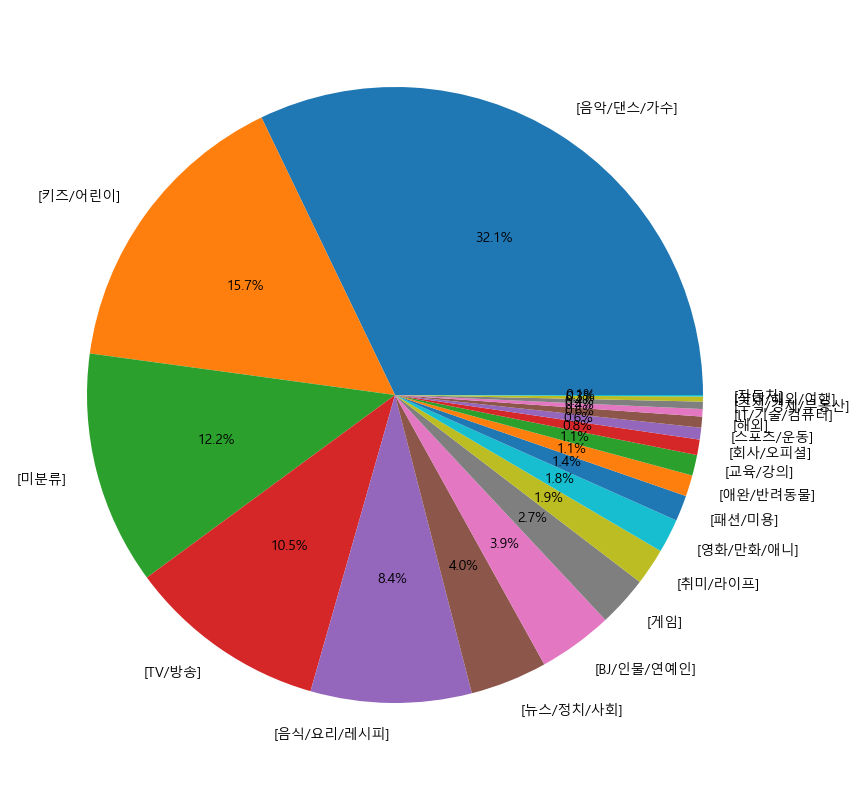

In [56]:
# 카테고리별 구독자수 시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['구독자수 합계'], labels=pivot_df['카테고리'], autopct='%1.1f%%')
plt.show()

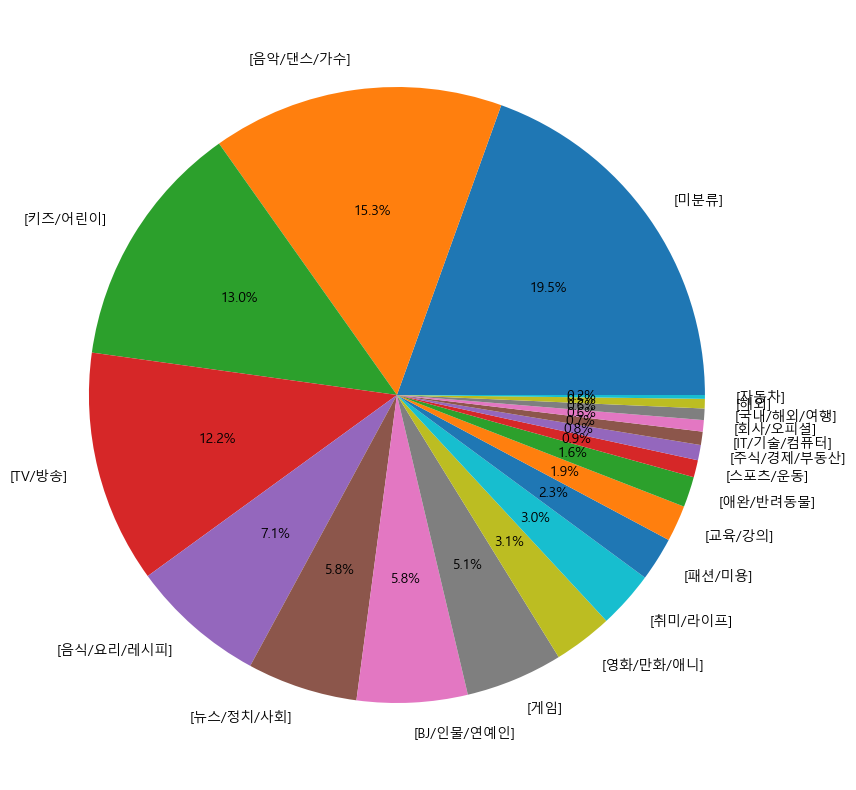

In [57]:
# 카테고리별 채널수 시각화하기
pivot_df = pivot_df.sort_values(by='채널 수', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['채널 수'], labels=pivot_df['카테고리'], autopct='%1.1f%%')
plt.show()